In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
image=cv2.imread('/content/dc-Cover-1l6a6k1877s08cpbn2cmq21sp6-20170402013109.Medi.jpeg')

In [86]:
type(image)

numpy.ndarray

In [18]:
image.shape

(448, 800, 3)

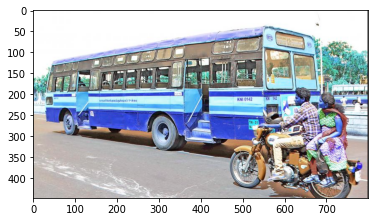

In [19]:
plt.imshow(image)

In [20]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

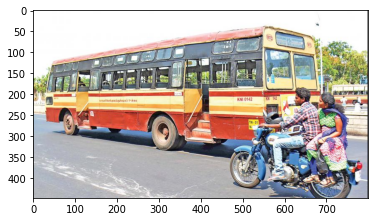

In [21]:
plt.imshow(image_rgb)

In [53]:
# Load Yolo
print("LOADING YOLO")

LOADING YOLO


In [30]:
# Load Yolo

yolo= cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [77]:
 #creating list of Classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [8]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [9]:
len(classes)

80

In [79]:
  # USing blob function of opencv to preprocess image
  #/Below line prepares the input image to run through the deep neural network.
blob = cv2.dnn.blobFromImage(image_rgb, 1 / 255.0, (320, 320),swapRB=False, crop=False)

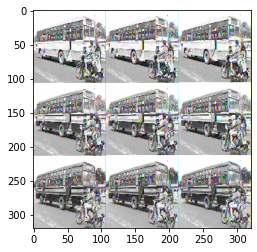

In [64]:
blob.shape


x= blob[0].reshape(320,320,3)
plt.imshow(x)

In [25]:
blob.shape

(1, 3, 320, 320)

In [78]:
 #setting the blob as input
yolo.setInput(blob)

In [82]:
#Below line draws rectangle over the given predicted region and writes class name over the box. And this will be our output.
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name)
height, width, channels = image_rgb.shape

In [67]:
#Now we need to find where we need to put our boxes or where the objects 
#are so that we will define the list and according to the condition we will append the list.

boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
    for detection in output:
        
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        
        if confidence>=0.5:
            
            
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
            
            
            x=int(center_x-w/2)
            y=int(center_y-h/2)
            
                
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            

In [68]:
len(boxes)

16

In [83]:
#Now we have to add this bonding boxes to our Images Using this below function
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [84]:
#For font type and colors
font= cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [85]:
#For each and evry object over there, We will add bounding boxes to this.
for i in indexes.flatten():
    x,y,w,h=boxes[i]
    
    labels=str(classes[class_ids[i]])
    confie=str(round(confidences[i],4))
    color=colors[i]
    
    cv2.rectangle(image_rgb,(x,y),(x+w,y+h),color,4)
    cv2.putText(image_rgb, labels+" "+confie,(x,y+50),font,4,(255,255,255),3)

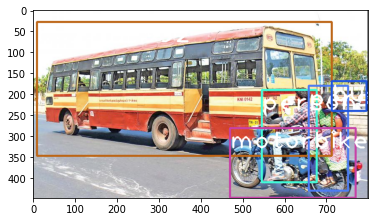

In [74]:
plt.imshow(image_rgb)

In [81]:
cv2.imwrite("./Detected.jpg",image_rgb)

True